# Mnist

Training of a CNN model on mnist. Reaches about 99.4 % quite easily; no data augmentation or such fancy things.

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras


In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize
X_train_full = X_train_full / 255.
X_test = X_test / 255.

# Split up into train and validation sets.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# Why do we add this axis? 
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [3]:
print(X_train.shape)

(55000, 28, 28, 1)


In [4]:
print(f"Train samples = {len(X_train)}")
print(f"Valid samples = {len(X_valid)}")
print(f"Test samples = {len(X_test)}")

Train samples = 55000
Valid samples = 5000
Test samples = 10000


In [37]:
# Reset.
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# CNN model.
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding="same", input_shape=[28, 28, 1]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="same"),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=50, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

# Train.
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 100352)            0

[0.023127524182200432, 0.9936000108718872]

In [7]:
import matplotlib.pyplot as plt

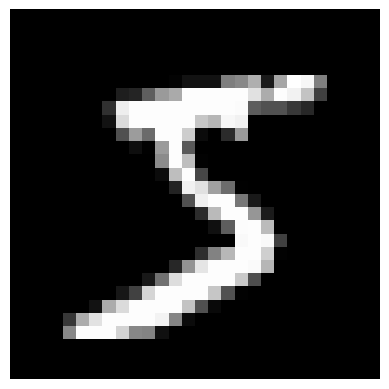

Prediction = 5


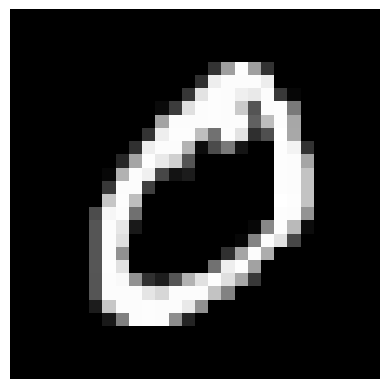

Prediction = 0


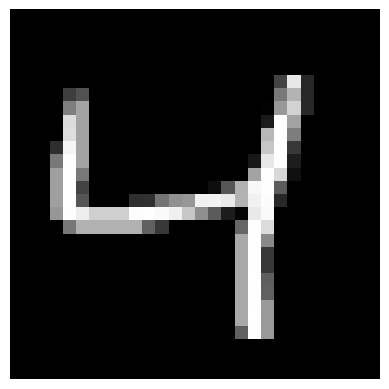

Prediction = 4


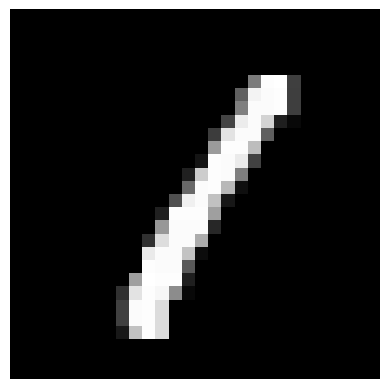

Prediction = 1


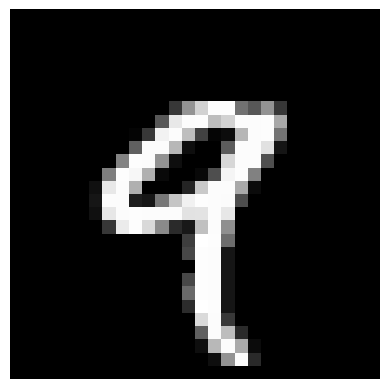

Prediction = 9


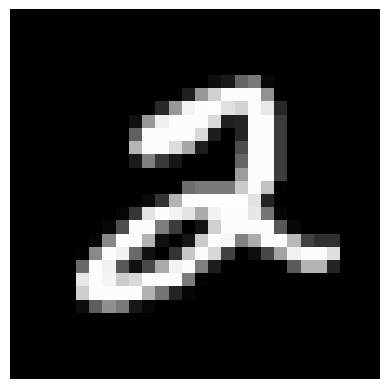

Prediction = 2


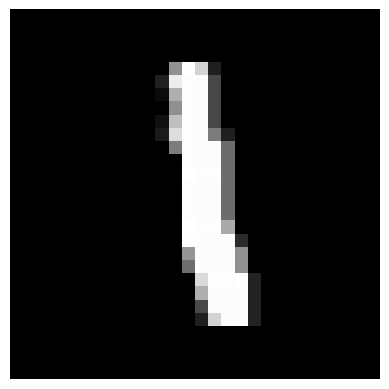

Prediction = 1


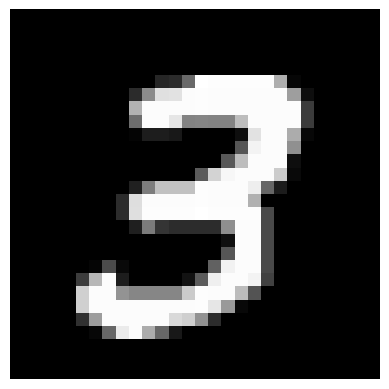

Prediction = 3


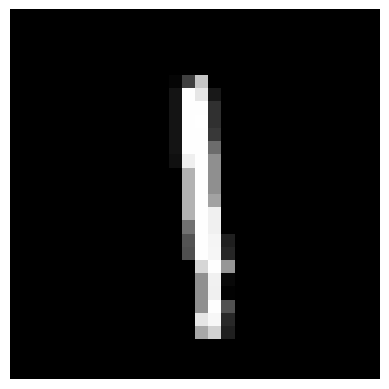

Prediction = 1


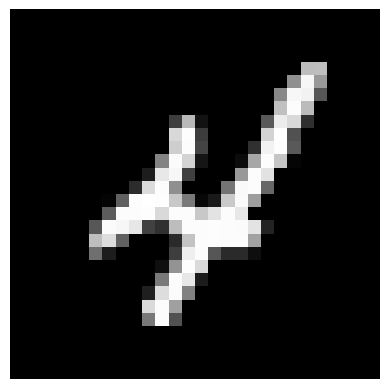

Prediction = 4


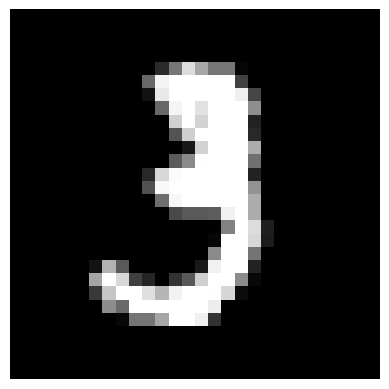

Prediction = 3


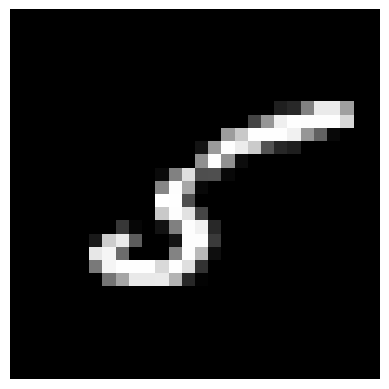

Prediction = 5


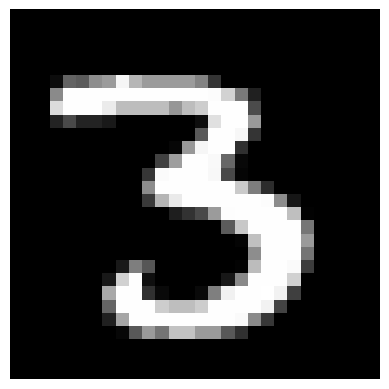

Prediction = 3


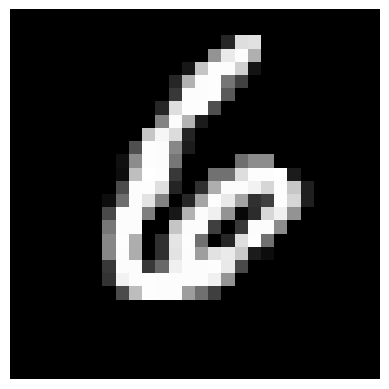

Prediction = 6


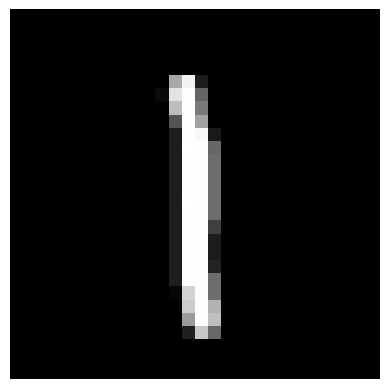

Prediction = 1


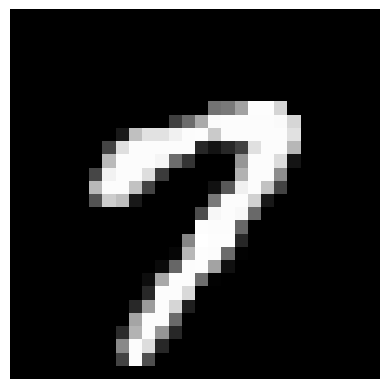

Prediction = 7


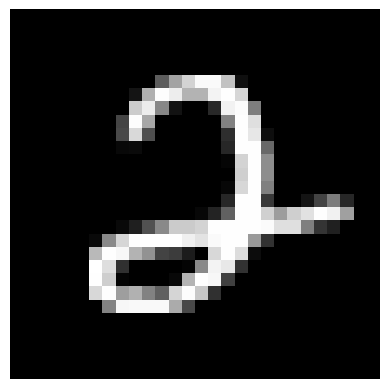

Prediction = 2


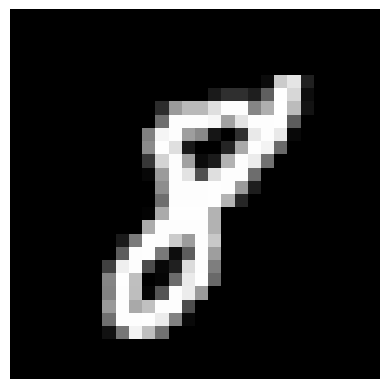

Prediction = 8


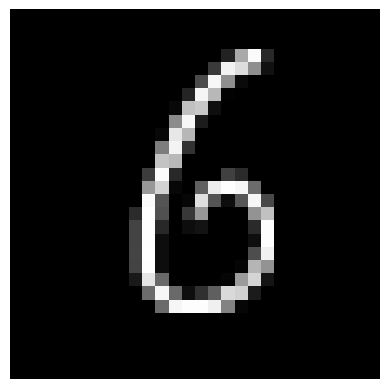

Prediction = 6


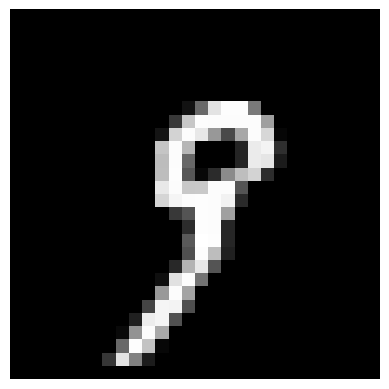

Prediction = 9


In [18]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")
    plt.show()

for i in range(20):
    plot_image(X_train[i])  
    pred = np.argmax(model.predict(X_train[i:i+1]))
    print(f"Prediction = {pred}")